# Download and analyse the latest river water quality information by catchment

### 1. Download water quality data for the area of interest

First we load the packages we're going to need

In [1]:
import geopandas as gpd
import pandas as pd
import io
import requests
import folium
from shapely.geometry import shape
print('Set-up completed')

Set-up completed


Then download the polygons and associated name and code for the River Wye management catchment from the Environment Agency Catchment Data API.

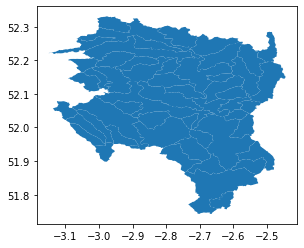

In [3]:
# get list of waterbodies in Wye catchment
wb_list_url = "https://environment.data.gov.uk/catchment-planning/so/WaterBody.csv?inManagementCatchment=3117"
wb = requests.get(wb_list_url).content
wbs = pd.read_csv(io.StringIO(wb.decode('utf-8')))

# download polygons for each waterbody catchment
for i in list(wbs['isVersionOf']):
    poly_url = i + '/polygon'
    poly = requests.get(poly_url)
    wbs.loc[wbs['isVersionOf']==i,'geometry']= shape(poly.json())
    
# create geodataframe and plot catchments
wbs_gdf = gpd.GeoDataFrame(wbs)
wbs_gdf.plot()